# **AYUDANTÍA 8 - Introducción a la Ciencia de Datos - IMT2200**
- Rocío Ladrón de Guevara (rociohgj@uc.cl)
- Daniela Victorero (dvictorerol@uc.cl)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Análisis Exploratorio de Datos - Proceso Completo

Complementaremos lo observado en las ayudantías 6 y 7 para generar un proceso completo de Análisis Exploratorio de Datos

Retomemos el ejemplo de la ayudantía 6:

# EJEMPLO: Productos en Amazon 2023 🛒

**Fuente : [Amazon Products Dataset 2023 (1.4M Products) - Kaggle](https://www.kaggle.com/datasets/asaniczka/amazon-products-dataset-2023-1-4m-products)**

Objetivo: Analizar la cantidad de ventas de un producto mediante distintas variables. Las preguntas que podríamos responder a partir de los datos son:

- ¿La cantidad de reviews es un determinador para la cantidad de ventas?
- ¿Cuál es la media de precios de cada categoría?
- ¿Que tanto varían los precios de cada categoría?
- ¿El precio de lista determina si un producto se venderá menos?

In [2]:
df_products = pd.read_csv('amazon_products.csv', encoding = 'utf-8')
df_products.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


Eliminemos las columnas que no nos aportan información relevante para el análisis:

In [3]:
df_products = df_products.drop(columns = ['imgUrl', 'title', 'productURL', 'listPrice'])
df_products.head()

,asin,stars,reviews,price,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,4.5,0,139.99,104,False,2000
1,B07GDLCQXV,4.5,0,169.99,104,False,1000
2,B07XSCCZYG,4.6,0,365.49,104,False,300
3,B08MVFKGJM,4.6,0,291.59,104,False,400
4,B01DJLKZBA,4.5,0,174.99,104,False,400


Tenemos un dataframe que relaciona cada id de categoría con su categoría respectiva:

In [4]:
df_categories = pd.read_csv('amazon_categories.csv')
df_categories.rename(columns={'id' : 'category_id'}, inplace = True)
df_categories

,category_id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies
...,...,...
243,262,"Xbox Series X & S Consoles, Games & Accessories"
244,263,PC Games & Accessories
245,264,Baby Girls' Clothing & Shoes
246,265,Boys' School Uniforms


In [5]:
df_products = df_products.merge(df_categories, on = 'category_id')
df_products

,asin,stars,reviews,price,category_id,isBestSeller,boughtInLastMonth,category_name
0,B014TMV5YE,4.5,0,139.99,104,False,2000,Suitcases
1,B07GDLCQXV,4.5,0,169.99,104,False,1000,Suitcases
2,B07XSCCZYG,4.6,0,365.49,104,False,300,Suitcases
3,B08MVFKGJM,4.6,0,291.59,104,False,400,Suitcases
4,B01DJLKZBA,4.5,0,174.99,104,False,400,Suitcases
...,...,...,...,...,...,...,...,...
1426332,B07BW4W6QX,4.4,0,74.95,26,False,0,Car Electronics & Accessories
1426333,B08F7RH7NY,3.6,0,499.98,26,False,0,Car Electronics & Accessories
1426334,B0CD7FN8BV,3.8,0,49.99,26,False,0,Car Electronics & Accessories
1426335,B0B1QGRXKX,3.0,0,228.88,26,False,0,Car Electronics & Accessories


Intentemos responder las preguntas mediante análisis de gráficos:

¿La cantidad de reviews es un determinador para la cantidad de ventas?

Text(0.5, 1.0, 'Cantidad de reviews v/s Cantidad de ventas en el último mes')

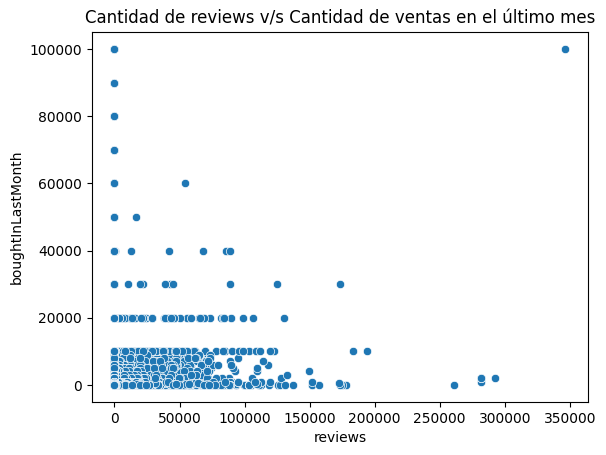

In [6]:
sns.scatterplot(data = df_products, x = 'reviews', y = 'boughtInLastMonth')
plt.title('Cantidad de reviews v/s Cantidad de ventas en el último mes')

Text(0.5, 1.0, 'Cantidad de reviews v/s Cantidad de ventas en el último mes')

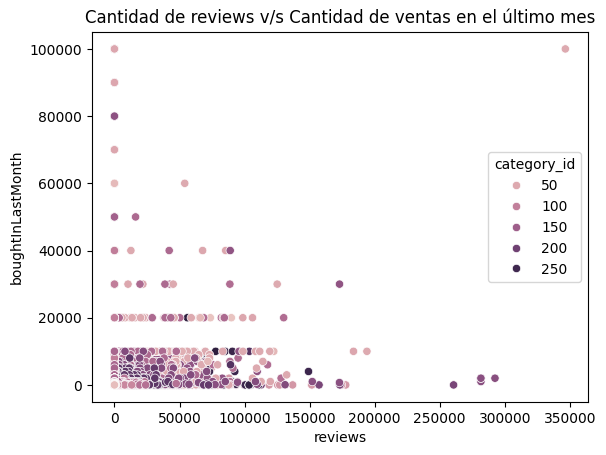

In [7]:
sns.scatterplot(data = df_products, x = 'reviews', y = 'boughtInLastMonth', hue = 'category_id')
plt.title('Cantidad de reviews v/s Cantidad de ventas en el último mes')

Si observamos los gráficos, no existen relaciones muy claras entre ambas variables. Intentaremos hacer un gráfico por categoría para ver mejor las relaciones. Consideraremos las categorías con más de 12000 productos.

In [8]:
counts = df_products['category_id'].value_counts()
counts.sort_values(ascending = False)

category_id
91     28619
84     24660
270    20846
114    19822
118    18994
       ...  
195       76
186       50
185       42
102       40
194       22
Name: count, Length: 248, dtype: int64

In [9]:
categories = pd.DataFrame(counts[counts > 12000]).reset_index()
cols = categories['category_id'].unique()
len(cols)

15

Text(0.5, 1.0, 'Cantidad de reviews v/s Cantidad de ventas en el último mes')

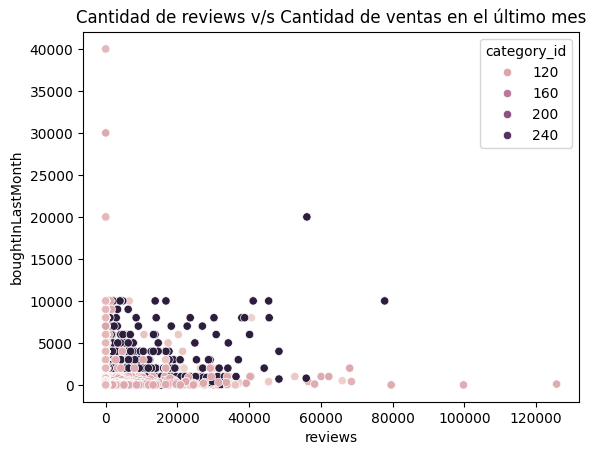

In [10]:
sns.scatterplot(data = df_products[df_products['category_id'].isin(cols)], x = 'reviews', y = 'boughtInLastMonth', hue = 'category_id')
plt.title('Cantidad de reviews v/s Cantidad de ventas en el último mes')

Eliminaremos los outliers

Text(0.5, 1.0, 'Cantidad de reviews v/s Cantidad de ventas en el último mes')

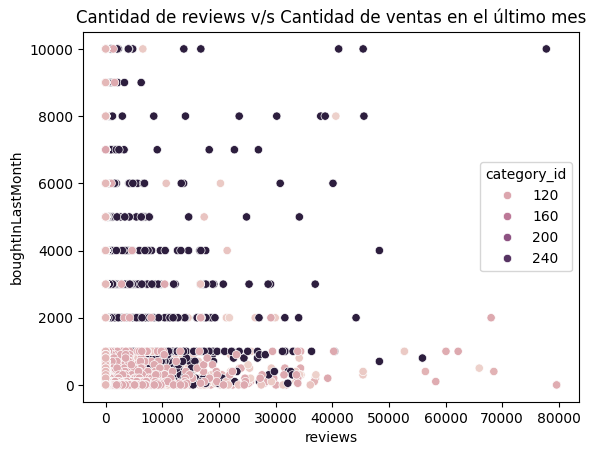

In [11]:
df_products_no_outliers = df_products[df_products['category_id'].isin(cols)]
df_products_no_outliers = df_products_no_outliers[(df_products_no_outliers['reviews'] <= 80000) & (df_products_no_outliers['boughtInLastMonth'] <= 12000)]
sns.scatterplot(data = df_products_no_outliers, x = 'reviews', y = 'boughtInLastMonth', hue = 'category_id')
plt.title('Cantidad de reviews v/s Cantidad de ventas en el último mes')

Aún no se nota una relación muy clara, por lo que lo ideal sería descartar la pregunta, asumir que no existe una relación, o trabajar con más variables para obtener relaciones más certeras.

¿Cuál es la media de precios de lista de cada categoría? y  ¿Que tanto varían los precios de cada categoría?

<Axes: xlabel='category_id', ylabel='price'>

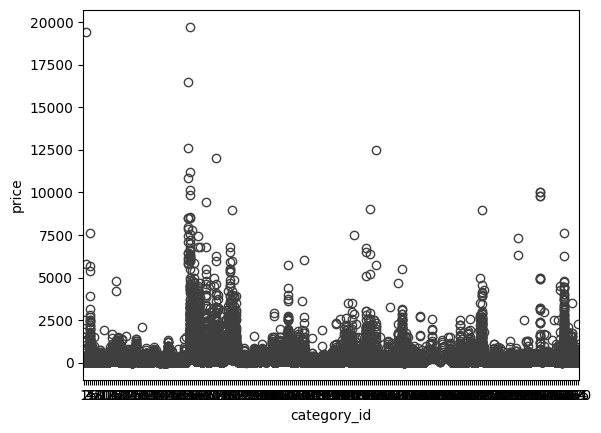

In [ ]:
sns.boxplot(data = df_products, x = "category_id", y = "price")

El gráfico anterior es difícil de interpretar porqué:
- Tenemos muchos outliers
- Hay muchas categorías

¿Qué podemos hacer?

En este caso, podríamos eliminar los outliers de price, y considerar ciertas categorías (dependiendo la cantidad de datos).

Consideraremos las categorías con más de 12000 productos

C:\Users\Daniela\AppData\Local\Temp\ipykernel_17032\1118809598.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


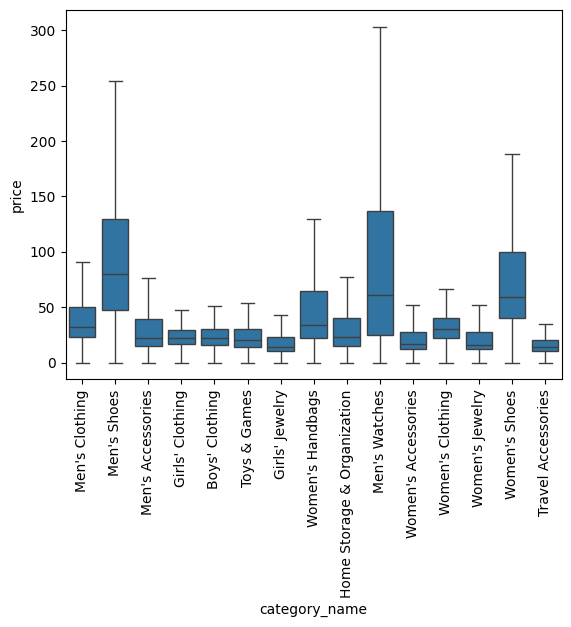

In [ ]:
ax = sns.boxplot(data = df_products[df_products['category_id'].isin(cols)], x = "category_name", y = "price", showfliers = False)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

Tenemos 

Ejercicio:


Creen gráficos en torno a las siguientes preguntas, y dependiendo de los resultados, replanteen las preguntas y/o objetivo. También, pueden generar nuevas preguntas a partir de los resultados observados.

- ¿Que tanto varían los precios de cada categoría?
- ¿El precio de lista determina si un producto se venderá menos?